# WQD 7006 GROUP ASSIGNMENT: CREDIT CARD FRAUD DETECTION

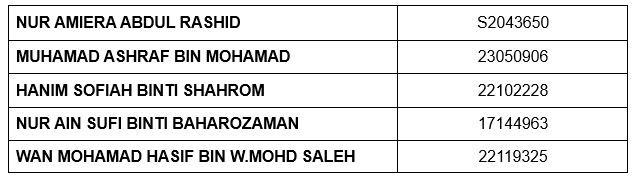

In [105]:
# from google.colab import drive
# drive.mount('/content/drive')

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# df = pd.read_csv('/content/drive/MyDrive/WQD7006 ML/Group 19 Group Assignment ML/creditcard.csv')
df = pd.read_csv("creditcard.csv")

In [108]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [109]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 1. Data Understanding

In [110]:
df.shape

(284807, 31)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [112]:
df.nunique()

Time      124592
V1        275653
V2        275655
V3        275657
V4        275654
V5        275657
V6        275652
V7        275651
V8        275643
V9        275656
V10       275646
V11       275648
V12       275654
V13       275657
V14       275653
V15       275653
V16       275645
V17       275646
V18       275655
V19       275645
V20       275632
V21       275617
V22       275644
V23       275611
V24       275645
V25       275640
V26       275647
V27       275597
V28       275558
Amount     32767
class          2
dtype: int64

In [113]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [114]:
pip install missingno

You should consider upgrading via the 'c:\Users\hasif\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

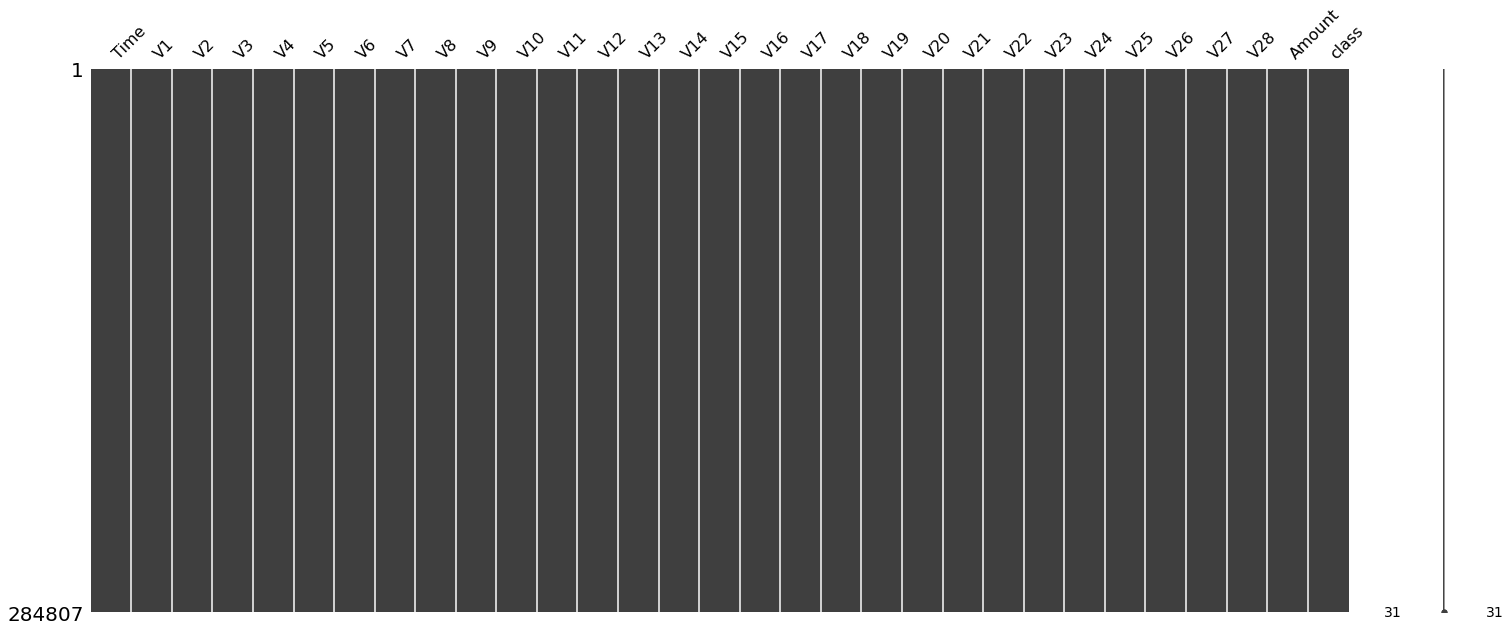

In [115]:
import missingno as mn
mn.matrix(df)

In [116]:
df.duplicated().any()

True

In [117]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Observations**
- Dataset has total of `284,807 rows` and `31 columns`.
- Dataset contains no null values.
- Dataset contains duplicated values.
- The mean of principle components `V1 - V28` are close to 0, which is expected as a result of PCA which involves centering the data by subtracting the mean.
- The average transaction amount based on the feature `Amount` is approximately 88.35.

# 2. Data Preprocessing

### 2.1 Dropping Duplicated Values

In [118]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().any()

False

In [119]:
df.shape

(283726, 31)

In [120]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [121]:
df["class"].unique()

array([0, 1], dtype=int64)

### 2.2 Check Skewness of Features

In [122]:
df.skew().sort_values()

V8        -8.310970
V23       -5.867221
V2        -4.695162
V17       -3.690497
V1        -3.273271
V5        -2.414079
V12       -2.199008
V3        -2.151984
V20       -2.043121
V14       -1.918804
V16       -1.051161
V27       -0.753804
V24       -0.552129
V25       -0.415744
V15       -0.309659
V18       -0.248661
V22       -0.182330
Time      -0.035581
V13        0.064293
V19        0.108312
V11        0.344074
V9         0.537663
V26        0.580292
V4         0.671504
V10        1.252967
V6         1.829880
V21        2.820033
V7         2.890271
V28       11.555115
Amount    16.978803
class     24.430545
dtype: float64

- Highly `-vely` skewed features: V8, V23, V2, V17, V1, V5, V12, V3, V20, V14
- Highly `+vely` skewed features: V6, V7, V21, V28, Amount, class

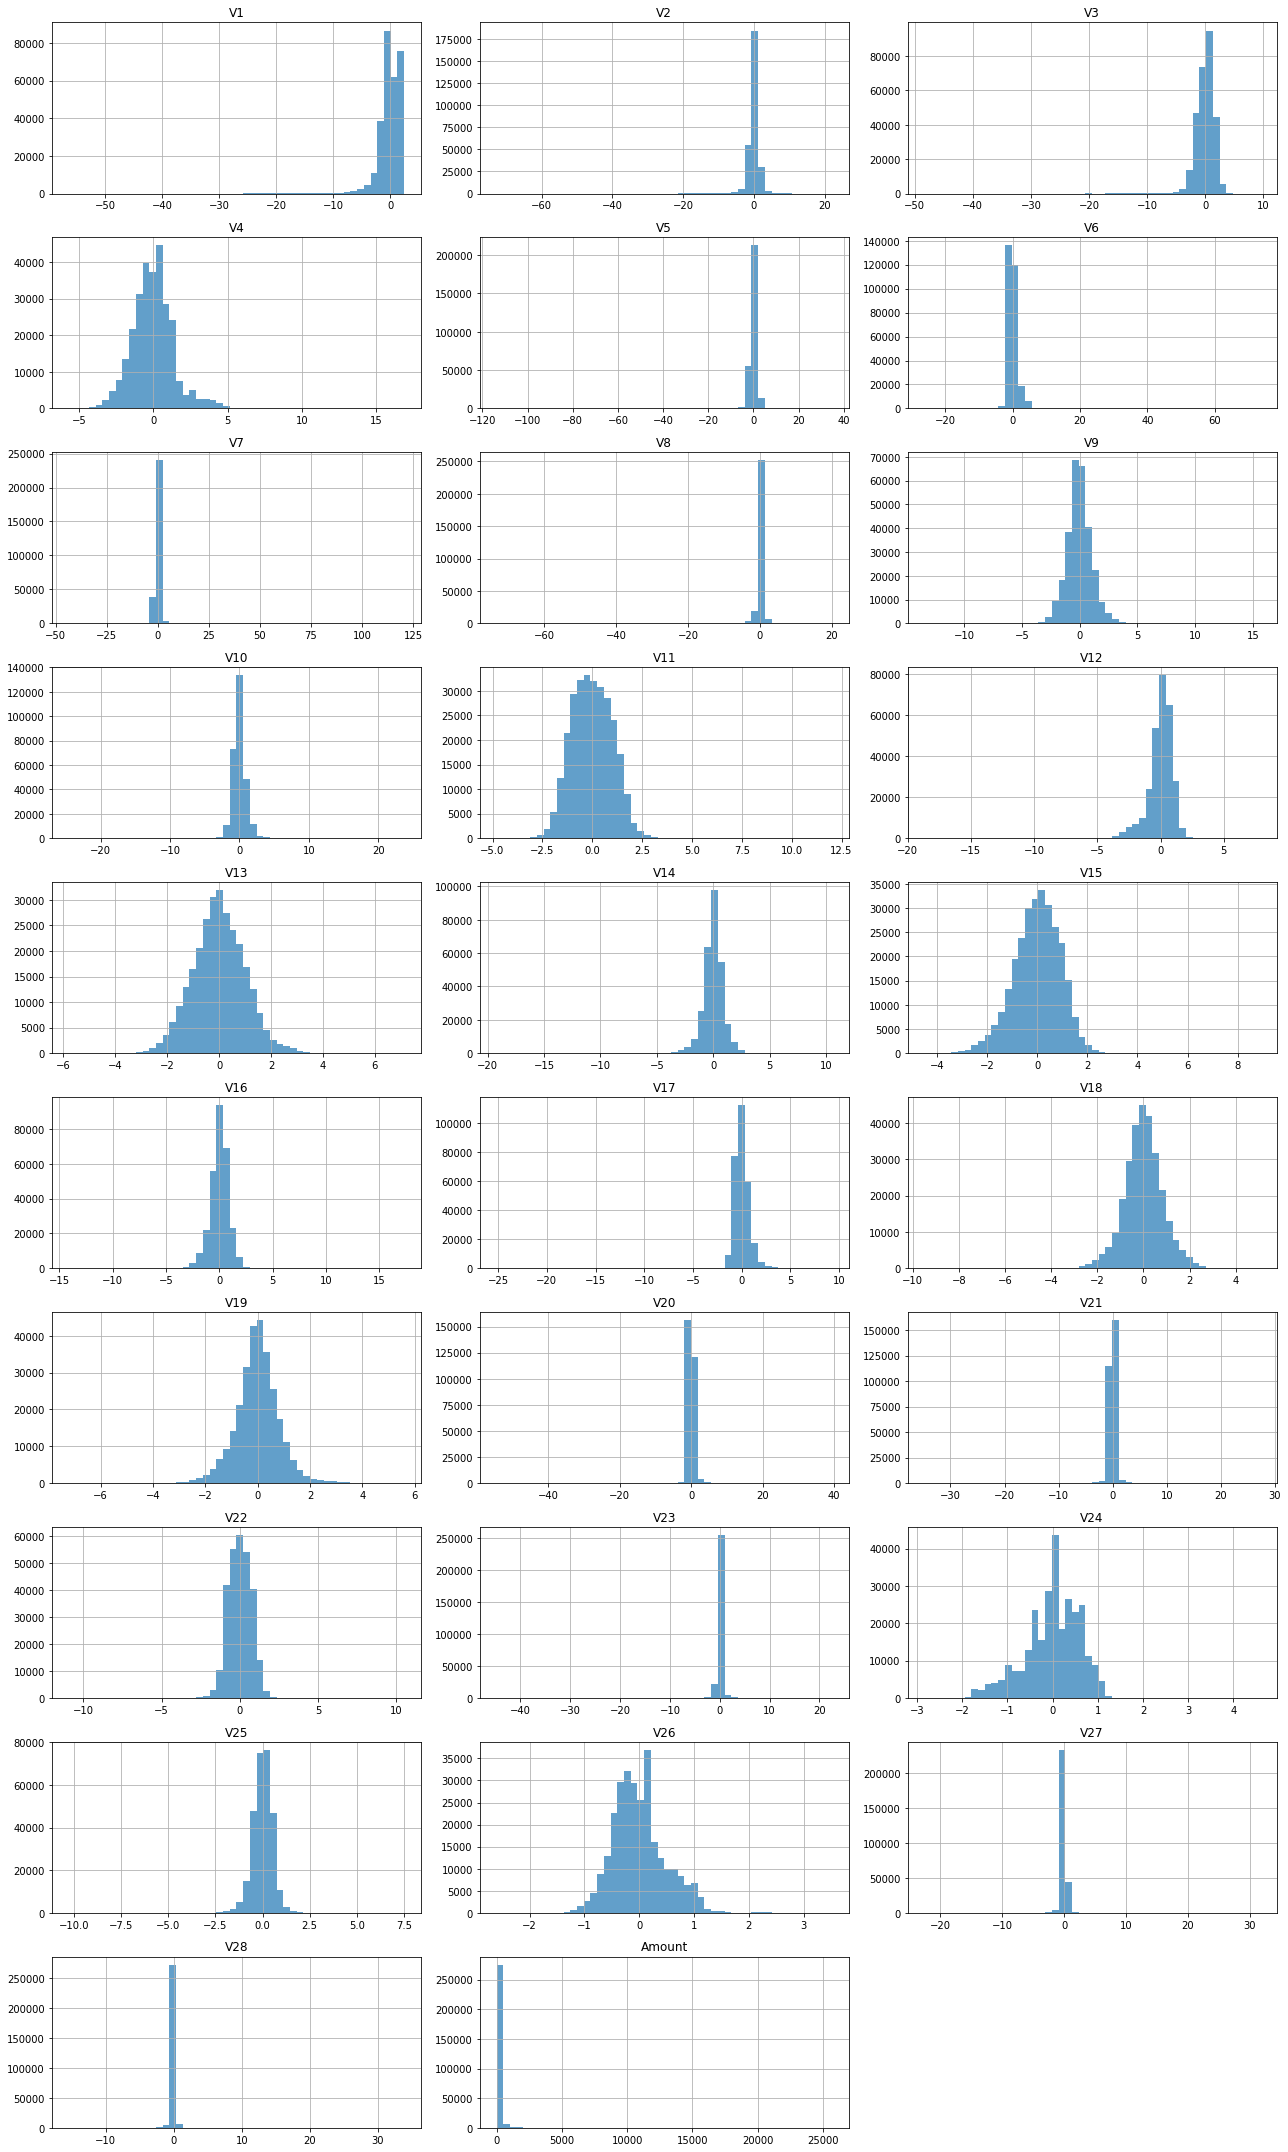

In [123]:
plt.figure(figsize=(18, 30))

# Plot histograms for each column except 'Time' and 'class'
features = df.columns.drop(['Time', 'class'])

# Create a histogram for each feature
for i, feature in enumerate(features):
    plt.subplot(10, 3, i + 1)
    df[feature].hist(bins=50, alpha=0.7)
    plt.title(feature)

plt.tight_layout()
plt.show()

# 3. Data Sampling


### Handling Imbalanced Class

In [124]:
df['class'].value_counts()

0    283253
1       473
Name: class, dtype: int64

,count,distribution
Genuine,283253,99.83329
Fraud,473,0.16671


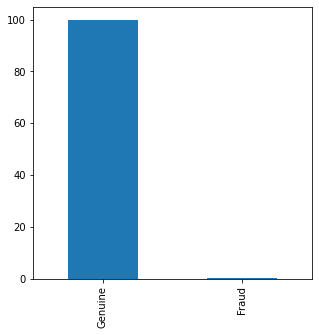

In [125]:
a = df['class'].value_counts().rename('count')
b = (df['class'].value_counts(normalize=True)*100).rename('distribution')

df_class = pd.concat([a,b], axis=1)
df_class.index = ["Genuine", "Fraud"]
df_class['distribution'].plot(kind='bar', figsize=[5,5])
df_class

- The `class` feature demonstrates `'0 - Genuine'` with a relatively higher count than `'1 - Fraud'` presenting an imbalanced distribution.

Due to the imbalanced distribution in `class`, it needs to be addressed prior to ML training and testing. In order to overcome this problem, 2 methods of sampling will be employed:


1.   Oversampling via SMOTE
2.   Undersampling



SMOTE stands for Synthetic Minority Oversampling Technique.This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases.

Remove Null

In [126]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [127]:
# Checking how many rows contain nulls
null_rows_count = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {null_rows_count}")


Number of rows with at least one NaN value: 0


In [128]:
print(f"Shape before removing null: {df.shape}" )

df= df.dropna()

print(f"Shape after removing null: {df.shape}")

#Drop time column
df = df.drop('Time', axis=1)

Shape before removing null: (283726, 31)
Shape after removing null: (283726, 31)


In [129]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A total of 1 row containing null values is removed

### 3.1 Splitting the Dataset (X = Features, y = Target)

In [130]:
X = df.drop('class', axis = 1)
y = df['class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [132]:

# Scale the data
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)



# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [133]:
X_train.shape
X_test.shape

(56746, 29)

### 3.2 Oversampling via SMOTE

In [134]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

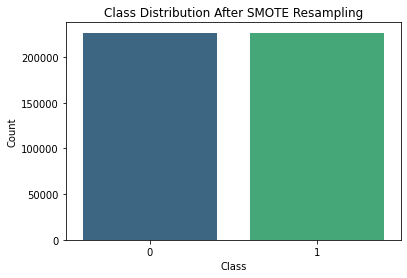

In [135]:
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [136]:
print(pd.Series(y_train_smote).value_counts())

0    226597
1    226597
Name: class, dtype: int64


In [137]:
# Model Using Oversampling technique (SMOTE)


# model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 3)
# model.fit(X_train_smote, y_train_smote)
# predictions = model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

### 3.3 Undersampling Majority Class



In [138]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

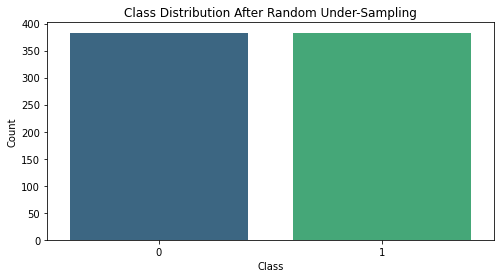

In [139]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_rus, palette='viridis')
plt.title('Class Distribution After Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [140]:
print(pd.Series(y_train_rus).value_counts())

0    383
1    383
Name: class, dtype: int64


## Using Random Forest

- With addressed data imbalance
- Without addressing data imbalance
- Hyper parameter tuning


In [141]:
# pip install shap

In [142]:
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,confusion_matrix
import shap

In [143]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [150]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
104697,1.054379,-0.764756,0.160168,0.665587,1.113466,4.771656,-1.536609,1.306483,1.565054,-0.349941,...,0.050995,-0.097138,-0.029759,-0.171596,1.047201,0.698595,-0.217939,0.101970,0.040152,-0.128006
134356,-4.805134,4.351191,-0.916135,-0.900752,-0.870777,-0.782946,0.328104,0.582501,2.749336,4.728060,...,2.160193,-0.854486,-0.758266,0.147005,-0.021274,0.552660,0.008318,0.431835,-0.436239,-0.314109
42637,-1.549833,-0.261143,1.556289,-2.037817,-0.366315,-1.334314,0.165406,-0.025782,-1.472751,-0.172838,...,-0.347365,-0.405656,-0.951005,-0.147752,0.424100,0.081845,1.103559,-0.502271,-0.248822,-0.169301
882,0.216344,0.663182,1.303520,0.169219,-0.404266,-0.517288,-0.036938,-0.838221,-0.528675,-0.174777,...,-0.184929,0.552788,-0.961206,-0.014642,0.525962,0.750877,0.141543,0.045107,0.127321,-0.339030
263275,-0.273365,0.825649,0.555674,0.384915,1.343842,1.984159,0.321808,0.510275,-0.891463,-0.115561,...,0.172188,0.346482,1.162889,-0.557535,-0.896146,0.503553,0.555129,0.129099,0.047571,-0.341985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154645,-0.770202,0.837344,2.577987,4.730948,0.022972,0.723626,0.000571,0.207992,-0.391169,0.884210,...,0.388969,0.128625,0.313392,-0.053439,-0.066768,0.113695,0.531149,0.037346,0.101904,0.029422
107561,1.051961,-0.835149,0.801527,0.700204,-1.389168,-0.364323,-0.584358,-0.057858,-0.425812,0.644106,...,-0.299870,-0.168762,-0.139388,-0.160697,0.378303,0.471809,-0.235528,0.052804,0.055817,0.185813
185406,1.976646,-0.307673,-0.943425,0.038003,-0.226856,-0.677663,-0.151479,-0.049804,0.446497,0.268931,...,-0.177760,-0.426105,-1.386126,0.478793,-0.482260,-0.742871,0.025402,-0.083591,-0.059167,-0.221617
59492,-2.847982,-2.335998,1.712881,-0.237077,0.321139,-0.790762,0.243713,-0.292275,1.126027,-0.158992,...,-1.496600,-0.551132,0.441075,1.883552,0.614984,-0.532756,0.694734,0.258013,-0.358734,0.013128


In [191]:
import psutil
#Measure the execution time 
import time

## Normalised

Accuracy: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Execution Time: 87.47073769569397 seconds
CPU usage change: 6.699999999999999%
Memory usage change: -414715904 bytes
Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


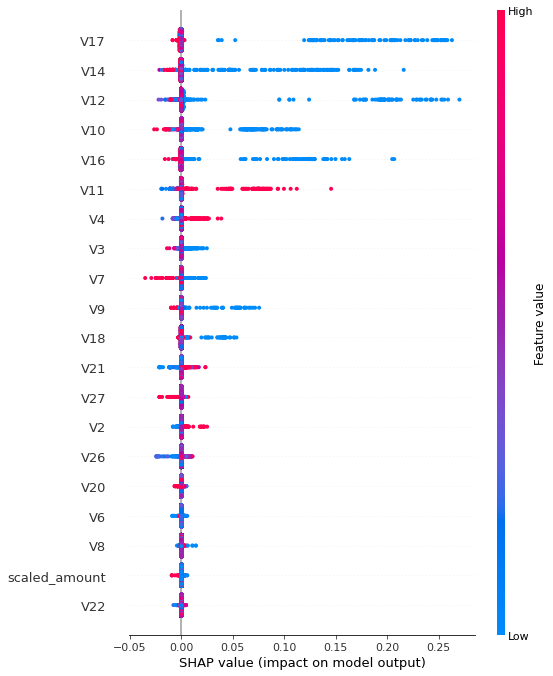

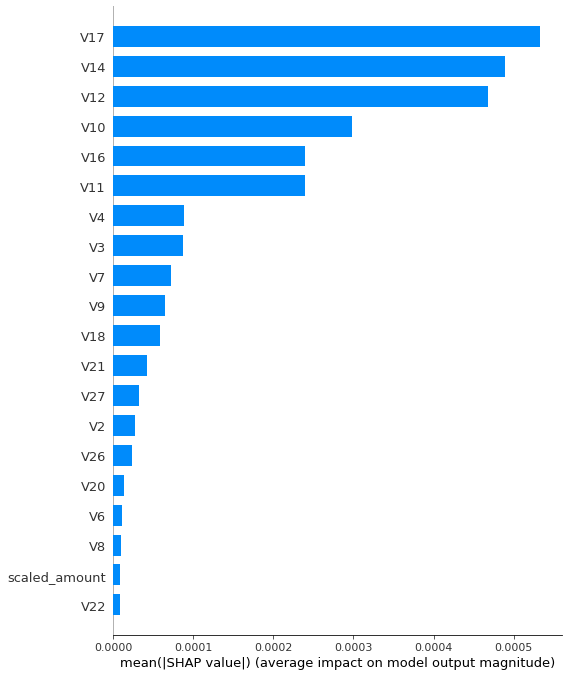

Execution Time with SHAP: 113.39393615722656 seconds
CPU usage change with SHAP: 2.1999999999999993%
Memory usage change with SHAP: -305201152 bytes


In [193]:

##### NORMALIZED

df = pd.read_csv("creditcard.csv")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#####################################################
# Before a process
#Memory
cpu_before = psutil.cpu_percent()
memory_before = psutil.virtual_memory().used

#Time
start_time = time.time()
#######################################################################


# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train, y_train)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))



# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)




# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')
else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")



## RUS

In [179]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Accuracy: 0.9941
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.87      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962

Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


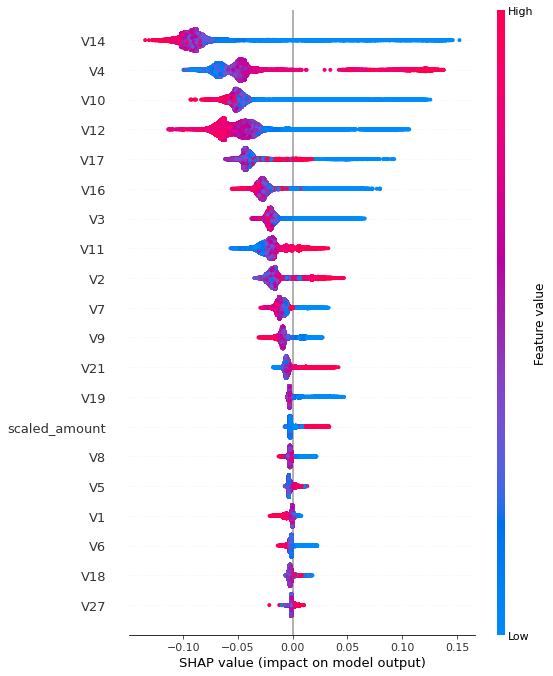

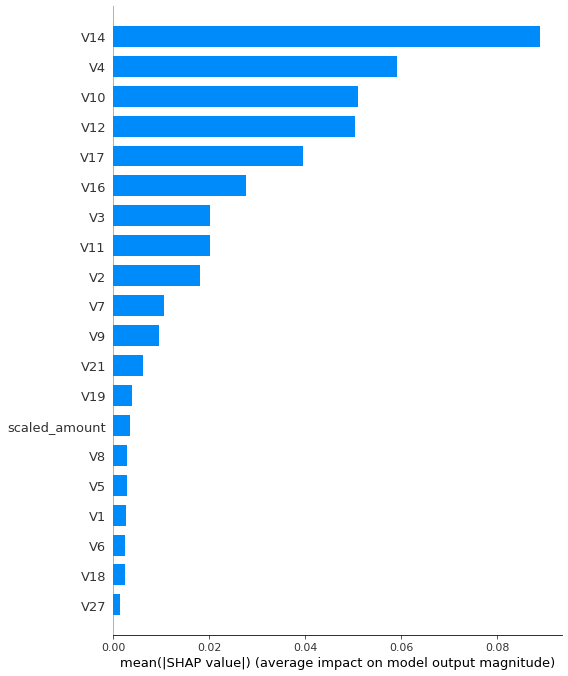

In [180]:
### RUS


df = pd.read_csv("creditcard.csv")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##RUS

from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

###

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train_rus, y_train_rus)

# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)



# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))

# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
    # Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')

else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")

## SMOTE

Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.87      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.93      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


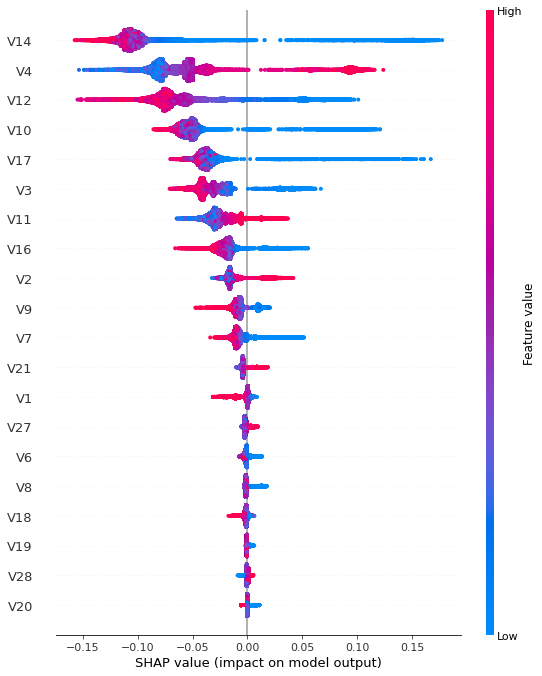

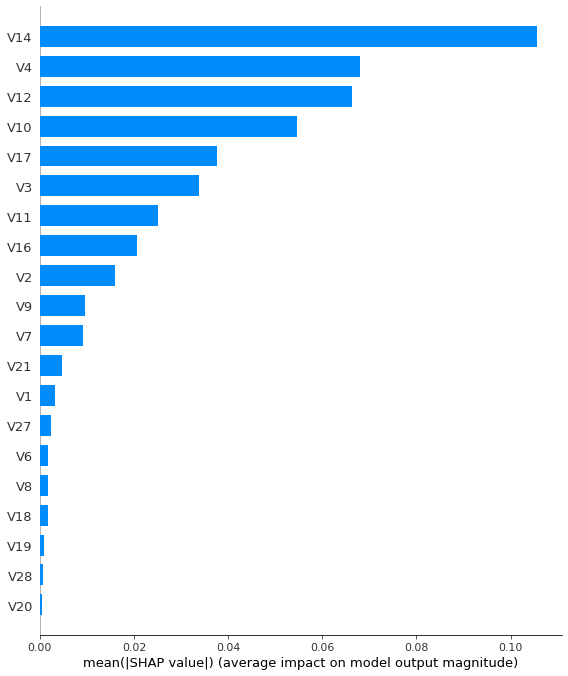

In [190]:

df = pd.read_csv("creditcard.csv")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import shap

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##RUS

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

###

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train_smote, y_train_smote)

# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))

# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')

else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")

Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.87      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.93      0.69     56962
weighted avg       1.00      1.00      1.00     56962

RUS
Execution Time: 193.71019577980042 seconds
CPU usage change: 16.6%
Memory usage change: 2.21484375 MiB
Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


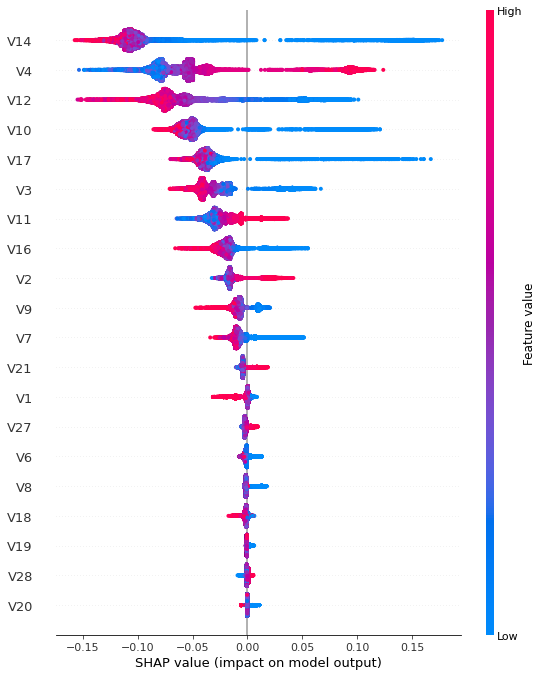

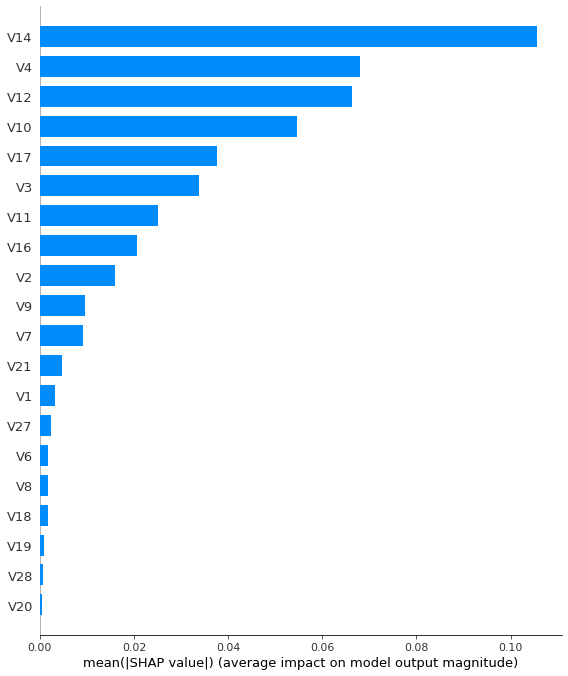

RUS
Execution Time with SHAP: 232.7900903224945 seconds
CPU usage change with SHAP: 43.300000000000004%
Memory usage change with SHAP: 68.19140625 MiB


# Accuracy Comparison

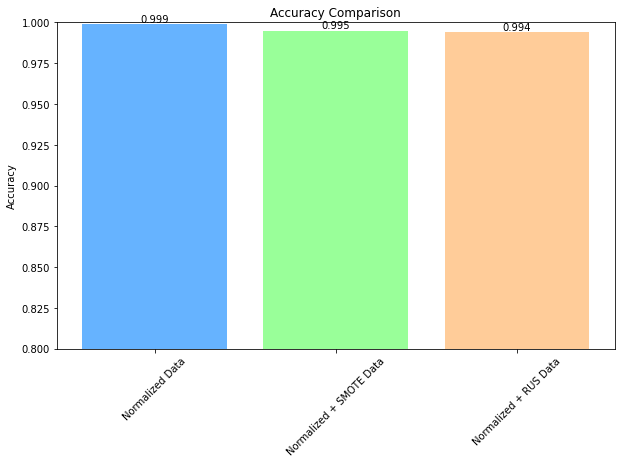

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and get accuracy
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Original Data
accuracy_original = train_and_evaluate(X_train, y_train, X_test, y_test)

# Random Under-Sampling (RUS)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
accuracy_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
accuracy_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)

# Plotting
accuracies = [accuracy_original, accuracy_smote, accuracy_rus]
labels = ['Normalized Data', 'Normalized + SMOTE Data', 'Normalized + RUS Data']
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=colors)
plt.ylim([0.8, 1.0])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(accuracy, 3), ha='center', va='bottom')

plt.show()


# Precision, Recall, F1-Score, Confusion Matrix Comparison

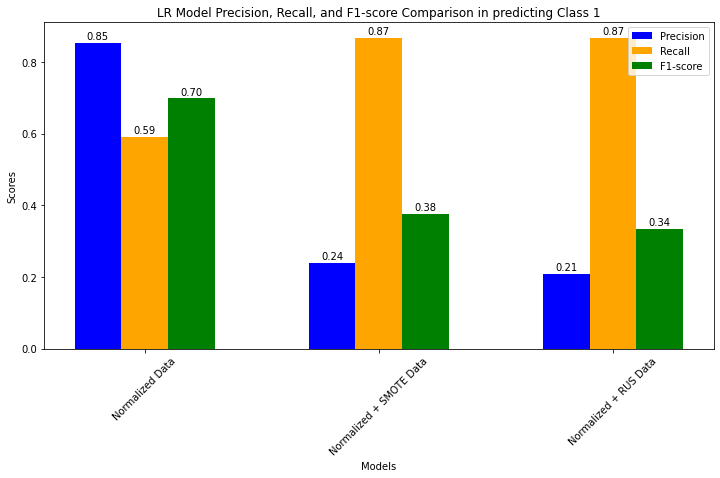

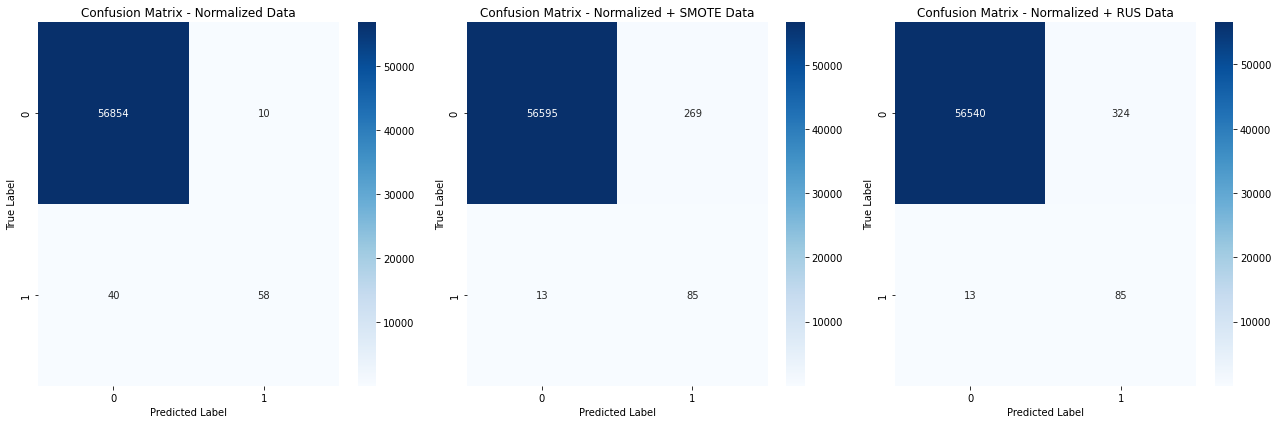

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and get evaluation metrics
def train_and_evaluate(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
    cm = confusion_matrix(y_test, predictions)
    return precision, recall, f1, cm

# Original Data
precision_original, recall_original, f1_original, cm_original = train_and_evaluate(X_train, y_train, X_test, y_test)

# Random Under-Sampling (RUS)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
precision_rus, recall_rus, f1_rus, cm_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
precision_smote, recall_smote, f1_smote, cm_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test)

# Plotting Precision, Recall, and F1-score comparison
labels = ['Normalized Data', 'Normalized + SMOTE Data', 'Normalized + RUS Data']
precision_scores = [precision_original, precision_smote, precision_rus]
recall_scores = [recall_original, recall_smote, recall_rus]
f1_scores = [f1_original, f1_smote, f1_rus]

x = range(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x, precision_scores, width, label='Precision', color='b')
plt.bar([p + width for p in x], recall_scores, width, label='Recall', color='orange')
plt.bar([p + width*2 for p in x], f1_scores, width, label='F1-score', color='green')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('LR Model Precision, Recall, and F1-score Comparison in predicting Class 1')
plt.xticks([p + width for p in x], labels, rotation=45)
plt.legend()

# Adding text on top of bars
for i in range(len(x)):
    plt.text(x[i], precision_scores[i] + 0.01, f"{precision_scores[i]:.2f}", ha='center')
    plt.text(x[i] + width, recall_scores[i] + 0.01, f"{recall_scores[i]:.2f}", ha='center')
    plt.text(x[i] + width*2, f1_scores[i] + 0.01, f"{f1_scores[i]:.2f}", ha='center')

plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(cm_original, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Confusion Matrix - Normalized Data")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Confusion Matrix - Normalized + SMOTE Data")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

sns.heatmap(cm_rus, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Confusion Matrix - Normalized + RUS Data")
axes[2].set_xlabel("Predicted Label")
axes[2].set_ylabel("True Label")

plt.tight_layout()
plt.show()


## ROC CURVE

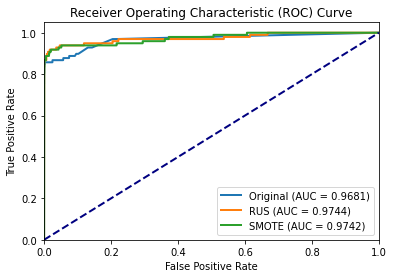

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and get ROC curve
def train_and_evaluate(X_train, y_train, X_test, y_test, label):
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.4f})')
    return model

# Original
model_original = train_and_evaluate(X_train, y_train, X_test, y_test, 'Original')

# RandomUnderSampler (RUS)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test, 'RUS')

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE')

# Plotting
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AUPRC

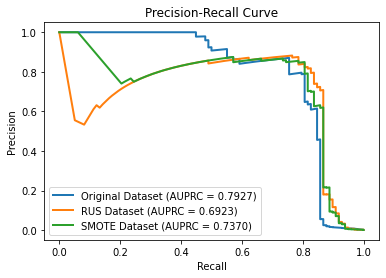

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train model and get Precision-Recall curve
def train_and_evaluate(X_train, y_train, X_test, y_test, label):
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'{label} (AUPRC = {pr_auc:.4f})')
    return model

# Original
model_original = train_and_evaluate(X_train, y_train, X_test, y_test, 'Original Dataset')

# RandomUnderSampler (RUS)
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
model_rus = train_and_evaluate(X_train_rus, y_train_rus, X_test, y_test, 'RUS Dataset')

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
model_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE Dataset')

# Plotting
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


## Performance comparison (Execution Time, CPU Usage, Memory Usage)

In [ ]:
def get_process_memory():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # Convert bytes to MiB

# Normalized

Accuracy: 0.9991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Normalized
Execution Time: 91.97117733955383 seconds
CPU usage change: 21.7%
Memory usage change: -0.41796875 MiB
Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


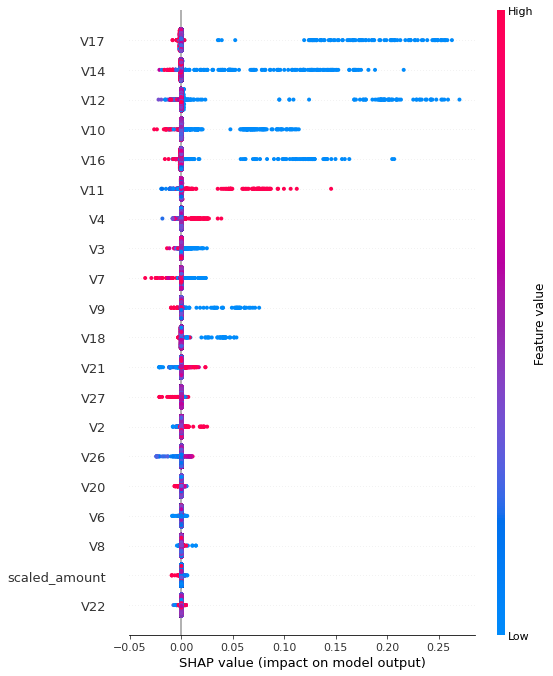

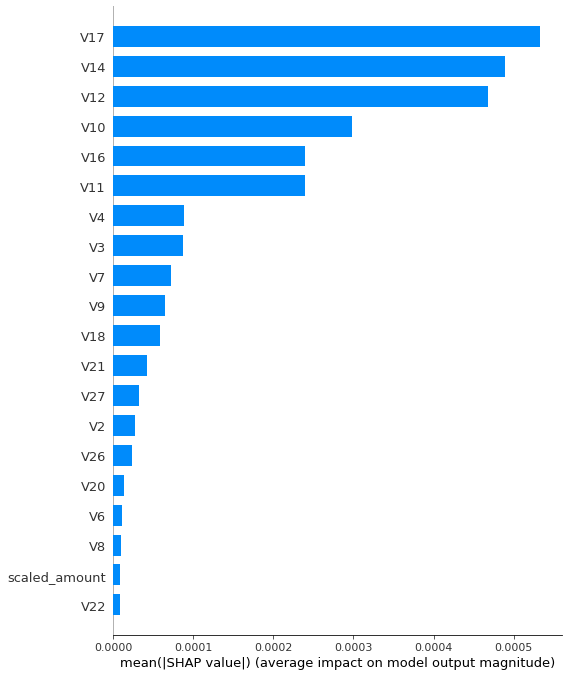

Normalized
Execution Time with SHAP: 126.28405857086182 seconds
CPU usage change with SHAP: 39.0%
Memory usage change with SHAP: -58.8203125 MiB


In [207]:

##### NORMALIZED

df = pd.read_csv("creditcard.csv")


# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#####################################################


# Measure initial CPU and memory usage
cpu_before = psutil.cpu_percent(interval=None)
memory_before = get_process_memory()
start_time = time.time()



###################################################

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train, y_train)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))


#####################################################


# Measure CPU and memory after prediction but before SHAP
cpu_after_prediction = psutil.cpu_percent(interval=None)
memory_after_prediction = get_process_memory()
end_time_prediction = time.time()

# Calculate metrics for training and prediction
execution_time_prediction = end_time_prediction - start_time
cpu_usage_change_prediction = cpu_after_prediction - cpu_before
memory_usage_change_prediction = memory_after_prediction - memory_before

print("Normalized")
print(f"Execution Time: {execution_time_prediction} seconds")
print(f"CPU usage change: {cpu_usage_change_prediction}%")
print(f"Memory usage change: {memory_usage_change_prediction} MiB")


#########################################################



# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')
else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")


################
# Measure CPU and memory after SHAP
cpu_after_shap = psutil.cpu_percent(interval=None)
memory_after_shap = get_process_memory()
end_time_shap = time.time()

# Calculate metrics including SHAP
execution_time_shap = end_time_shap - start_time
cpu_usage_change_shap = cpu_after_shap - cpu_before
memory_usage_change_shap = memory_after_shap - memory_before

print("Normalized")
print(f"Execution Time with SHAP: {execution_time_shap} seconds")
print(f"CPU usage change with SHAP: {cpu_usage_change_shap}%")
print(f"Memory usage change with SHAP: {memory_usage_change_shap} MiB")


In [ ]:
df = pd.read_csv("creditcard.csv")


# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##RUS

from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#####################################################


# Measure initial CPU and memory usage
cpu_before = psutil.cpu_percent(interval=None)
memory_before = get_process_memory()
start_time = time.time()



#######################################################################


# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train_rus, y_train_rus)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))





#####################################################


# Measure CPU and memory after prediction but before SHAP
cpu_after_prediction = psutil.cpu_percent(interval=None)
memory_after_prediction = get_process_memory()
end_time_prediction = time.time()

# Calculate metrics for training and prediction
execution_time_prediction = end_time_prediction - start_time
cpu_usage_change_prediction = cpu_after_prediction - cpu_before
memory_usage_change_prediction = memory_after_prediction - memory_before

print("RUS")
print(f"Execution Time: {execution_time_prediction} seconds")
print(f"CPU usage change: {cpu_usage_change_prediction}%")
print(f"Memory usage change: {memory_usage_change_prediction} MiB")


#########################################################




# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)




# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')
else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")




################
# Measure CPU and memory after SHAP
cpu_after_shap = psutil.cpu_percent(interval=None)
memory_after_shap = get_process_memory()
end_time_shap = time.time()

# Calculate metrics including SHAP
execution_time_shap = end_time_shap - start_time
cpu_usage_change_shap = cpu_after_shap - cpu_before
memory_usage_change_shap = memory_after_shap - memory_before


print("RUS")
print(f"Execution Time with SHAP: {execution_time_shap} seconds")
print(f"CPU usage change with SHAP: {cpu_usage_change_shap}%")
print(f"Memory usage change with SHAP: {memory_usage_change_shap} MiB")

# RUS

Accuracy: 0.9941
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.87      0.34        98

    accuracy                           0.99     56962
   macro avg       0.60      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962

RUS
Execution Time: 1.1556367874145508 seconds
CPU usage change: 16.5%
Memory usage change: 1.83203125 MiB
Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


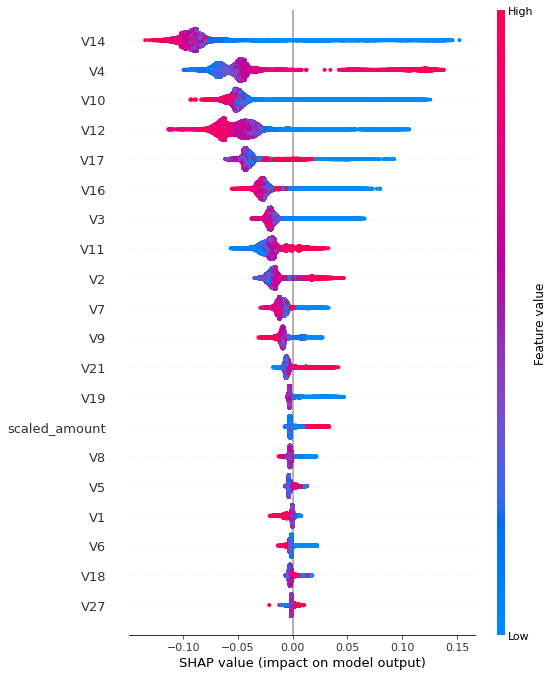

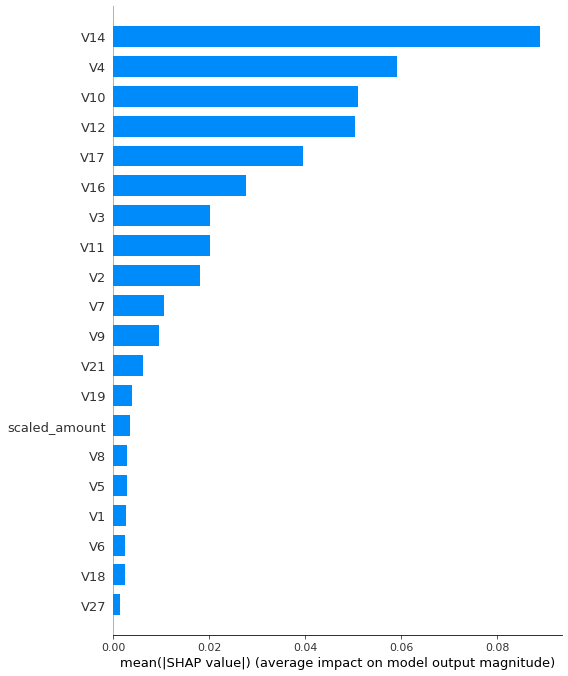

RUS
Execution Time with SHAP: 27.524467945098877 seconds
CPU usage change with SHAP: 20.0%
Memory usage change with SHAP: 67.0625 MiB


In [206]:
df = pd.read_csv("creditcard.csv")


# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##RUS

from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#####################################################


# Measure initial CPU and memory usage
cpu_before = psutil.cpu_percent(interval=None)
memory_before = get_process_memory()
start_time = time.time()



#######################################################################


# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train_rus, y_train_rus)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))





#####################################################


# Measure CPU and memory after prediction but before SHAP
cpu_after_prediction = psutil.cpu_percent(interval=None)
memory_after_prediction = get_process_memory()
end_time_prediction = time.time()

# Calculate metrics for training and prediction
execution_time_prediction = end_time_prediction - start_time
cpu_usage_change_prediction = cpu_after_prediction - cpu_before
memory_usage_change_prediction = memory_after_prediction - memory_before

print("RUS")
print(f"Execution Time: {execution_time_prediction} seconds")
print(f"CPU usage change: {cpu_usage_change_prediction}%")
print(f"Memory usage change: {memory_usage_change_prediction} MiB")


#########################################################




# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)




# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')
else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")




################
# Measure CPU and memory after SHAP
cpu_after_shap = psutil.cpu_percent(interval=None)
memory_after_shap = get_process_memory()
end_time_shap = time.time()

# Calculate metrics including SHAP
execution_time_shap = end_time_shap - start_time
cpu_usage_change_shap = cpu_after_shap - cpu_before
memory_usage_change_shap = memory_after_shap - memory_before


print("RUS")
print(f"Execution Time with SHAP: {execution_time_shap} seconds")
print(f"CPU usage change with SHAP: {cpu_usage_change_shap}%")
print(f"Memory usage change with SHAP: {memory_usage_change_shap} MiB")

# SMOTE

Accuracy: 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.87      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.93      0.69     56962
weighted avg       1.00      1.00      1.00     56962

SMOTE
Execution Time: 190.22775506973267 seconds
CPU usage change: 19.400000000000002%
Memory usage change: 0.375 MiB
Shape of shap_values: (56962, 30, 2)
Shape of X_test: (56962, 30)


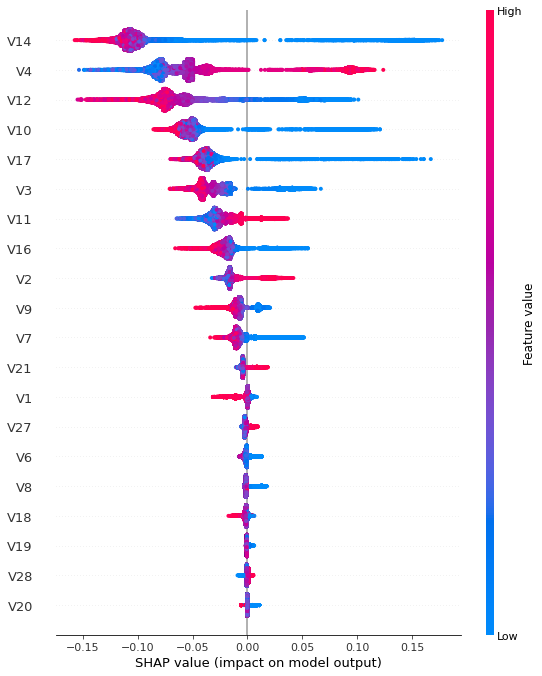

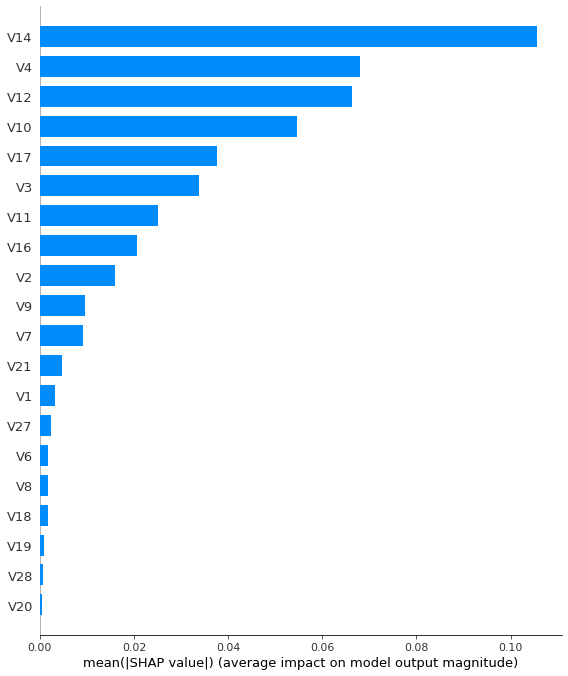

SMOTE
Execution Time with SHAP: 218.98561763763428 seconds
CPU usage change with SHAP: 18.5%
Memory usage change with SHAP: 67.2421875 MiB


In [208]:
#Test

##### NORMALIZED

df = pd.read_csv("creditcard.csv")

# Drop rows with missing values
df = df.dropna()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Scale the 'Amount' feature
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)

# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
#####################################################


# Measure initial CPU and memory usage
cpu_before = psutil.cpu_percent(interval=None)
memory_before = get_process_memory()
start_time = time.time()



#######################################################################


# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
model.fit(X_train_smote, y_train_smote)


# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, predictions))





#####################################################


# Measure CPU and memory after prediction but before SHAP
cpu_after_prediction = psutil.cpu_percent(interval=None)
memory_after_prediction = get_process_memory()
end_time_prediction = time.time()

# Calculate metrics for training and prediction
execution_time_prediction = end_time_prediction - start_time
cpu_usage_change_prediction = cpu_after_prediction - cpu_before
memory_usage_change_prediction = memory_after_prediction - memory_before

print("SMOTE")
print(f"Execution Time: {execution_time_prediction} seconds")
print(f"CPU usage change: {cpu_usage_change_prediction}%")
print(f"Memory usage change: {memory_usage_change_prediction} MiB")


#########################################################




# Explain the model predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)




# Print the shape of shap_values to debug
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Extract SHAP values for the positive class (class 1)
shap_values_class_1 = shap_values[:, :, 1]

# Ensure that the SHAP values matrix aligns correctly with the feature matrix
if shap_values_class_1.shape[0] == X_test.shape[0] and shap_values_class_1.shape[1] == X_test.shape[1]:
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns);
# Generate the summary plot as a bar plot
    shap.summary_plot(shap_values_class_1, X_test, feature_names=X.columns, plot_type='bar')
else:
    print("The shape of the SHAP values does not match the shape of the provided data matrix.")
    print(f"Shape of shap_values_class_1: {shap_values_class_1.shape}")
    print(f"Shape of X_test: {X_test.shape}")




################
# Measure CPU and memory after SHAP
cpu_after_shap = psutil.cpu_percent(interval=None)
memory_after_shap = get_process_memory()
end_time_shap = time.time()

# Calculate metrics including SHAP
execution_time_shap = end_time_shap - start_time
cpu_usage_change_shap = cpu_after_shap - cpu_before
memory_usage_change_shap = memory_after_shap - memory_before


print("SMOTE")
print(f"Execution Time with SHAP: {execution_time_shap} seconds")
print(f"CPU usage change with SHAP: {cpu_usage_change_shap}%")
print(f"Memory usage change with SHAP: {memory_usage_change_shap} MiB")